# Lecture 3 exercises

21-119-631 

### 1. Implementing convolution

#### (a) Generating signal

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mySignal = np.zeros(100)
mySignal[40:50] = np.ones(10)

#### (b) Generating kernel

In [3]:
kern = np.linspace(start = 1, stop = 0.2, num=5)

#### (c) Implementing convolution

In [9]:
def convolution_1d(signal, kernel):
    n_ker = kernel.size
    signal = np.pad(signal, (n_ker-1,), constant_values=0) # zero padding
    n_sig = signal.size
    n_conv = n_sig - n_ker + 1
    rev_kern = kernel[::-1].copy() # kernel flip
    result = np.zeros(n_conv)
    for i in range(n_conv):
        result[i] = np.dot(signal[i:i+n_ker], rev_kern)
    return result

In [7]:
convolved_sig = convolution_1d(mySignal, kern)

#### (d) Plotting signals

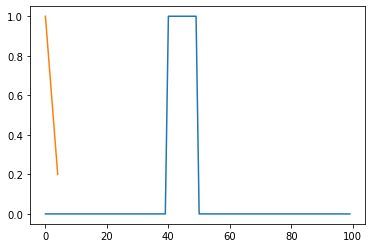

In [11]:
plt.plot(mySignal)
plt.plot(kern)


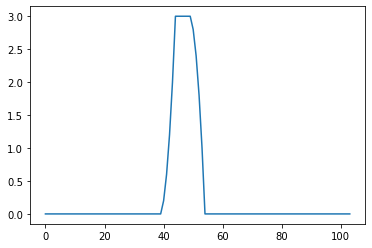

In [8]:
plt.plot(convolved_sig)

#### (e) Describing the effects of convolution

The result of convolution is combined by the characristics of the kernel and the signal. So what i created looks like a blend of the reversed kernel and mySignal. The squre edge is smoothed out.

### 2. Filtering MEG data via fourier transformation

#### (a) Importing raw data

In [ ]:
data = np.load('sample_audvis_raw.npy')
fs = 600
time = np.arange(data.shape[1]) / fs

#### (b) Applying Fourier transformation

In [ ]:
data.shape

In [ ]:
data1ch = data[0, :] # todo 1d fourier transform

In [ ]:
from scipy.fft import rfft, irfft, rfftfreq
W = rfftfreq(data1ch.size, 1 / fs)
f_signal = rfft(data1ch)

plt.plot(W, np.abs(f_signal))
plt.show()

#### (c) Band-pass filtering via Fourier transform

In [ ]:
cut_f_signal = f_signal.copy()
cut_f_signal[(W<1) | (W>20)] = 0

In [ ]:
plt.plot(W, np.abs(cut_f_signal))

#### (d) Transforming to the time domain from frequency domain

In [ ]:
cut_signal = irfft(cut_f_signal)

In [ ]:
cut_signal.size

In [ ]:
plt.subplot(221)
plt.plot(data1ch)
plt.subplot(222)
plt.plot(data1ch[500:1000])

plt.subplot(223)
plt.plot(cut_f_signal)
plt.subplot(224)
plt.plot(cut_f_signal[500:1000])
plt.show()

#### (e) Describing the effects of filtering

The signal at the beginning and after some time points disappeard.? Seeing from the remaining part it shows that after filtering the signal becomes more stable, fluctruate around average.